In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_cm(cm, labels):
    
    # calcula porcentagens 
    percent = (cm*100.0)/np.array(np.matrix(cm.sum(axis=1)).T)
    
    print('Confusion Matrix Stats')
    for i, label_i in enumerate(labels):
        for j, label_j in enumerate(labels):
            print("%s/%s: %.2f%% (%d/%d)" % (label_i, label_j, (percent[i][j]), cm[i][j], cm[i].sum()) )

    # Show confusion matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.grid(b=False)
    cax = ax.matshow(percent, cmap='coolwarm')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [4]:
dados = pd.read_csv('winequality.csv', sep=';')

In [241]:
sub_dados = dados.copy()

In [242]:
sub_dados.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [243]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null object
quality                 6497 non-null int64
dtypes: float64(10), int64(1), object(2)
memory usage: 660.0+ KB


In [244]:
types_wine = sub_dados.type.unique()

In [245]:
dict_type = {}
for i, _type in enumerate(types_wine):
    dict_type[_type] = i
dict_type

{'White': 0, 'Red': 1}

In [246]:
# Não há necessidade da coluna volatile acidity
# A coluna quality é a variável Y
# A coluna Type e alcohol precisa ser pré-processada
# y = quality
# x= todo restante


In [247]:
dados.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

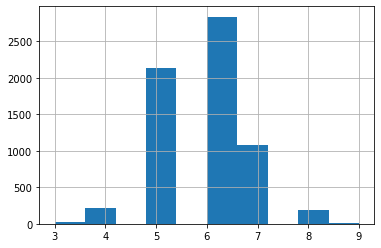

In [248]:
dados.quality.hist()

In [249]:
sub_dados.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [250]:
for i in range(0, len(sub_dados)):
    # print(sub_dados.loc[i, 'type'])
    sub_dados.loc[i, 'type'] = dict_type[sub_dados.loc[i, 'type']]

In [251]:
sub_dados.type.value_counts()

0    4898
1    1599
Name: type, dtype: int64

In [16]:
# Quality
# 0 - Ruim
# 1 Ótimo
#for i in range(0, len(sub_dados)):
#    if sub_dados.loc[i, 'quality'] < 6:
#        sub_dados.loc[i, 'quality'] = 0
#    else:
#        sub_dados.loc[i, 'quality'] = 1
lista_quality = []
sub_dados.quality = [ 0 if i < 6 else 1  for i in sub_dados.quality]
for i in sub_dados.quality:
    if i < 5:
        lista_quality.append(0)
    elif i >= 5 and i <= 6:
        lista_quality.append(1)
    else:
        lista_quality.append(2)
#sub_dados.quality = lista_quality

In [17]:
sub_dados.quality.value_counts()

1    4113
0    2384
Name: quality, dtype: int64

In [18]:
def check_is_num(x):
    try:
        float(x)
        return True
    except ValueError:
        return False

In [19]:
is_number = [ check_is_num(a) for a in sub_dados.alcohol]


In [20]:
vinhos_copia_2 = sub_dados.loc[is_number,:]

In [21]:
vinhos_copia_2.alcohol = [ float(v) for v in vinhos_copia_2.alcohol]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
vinhos_copia_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6457 entries, 0 to 6496
Data columns (total 13 columns):
type                    6457 non-null int64
fixed acidity           6457 non-null float64
volatile acidity        6457 non-null float64
citric acid             6457 non-null float64
residual sugar          6457 non-null float64
chlorides               6457 non-null float64
free sulfur dioxide     6457 non-null float64
total sulfur dioxide    6457 non-null float64
density                 6457 non-null float64
pH                      6457 non-null float64
sulphates               6457 non-null float64
alcohol                 6457 non-null float64
quality                 6457 non-null int64
dtypes: float64(11), int64(2)
memory usage: 706.2 KB


In [252]:
vinhos_copia_2.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000,6457.000000
mean,0.246709,7.219475,0.339684,0.318795,5.445973,0.056081,30.495586,115.690801,1.715329,3.218592,0.531169,10.489083,0.632182
std,0.431129,1.294910,0.164690,0.145506,4.764308,0.035110,17.757007,56.595196,7.659497,0.160845,0.148870,1.192961,0.482249
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,0.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992350,3.110000,0.430000,9.500000,0.000000
50%,0.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994900,3.210000,0.510000,10.300000,1.000000
75%,0.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,1.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,103.898000,4.010000,2.000000,14.900000,1.000000


### Criar X e Y

In [221]:
columns_x = ['type',
 #'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 #'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 #'density',
 'pH',
 'sulphates',
 'alcohol']
columns_x

['type',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol']

In [222]:
x = vinhos_copia_2.loc[:, columns_x]

In [223]:
y = vinhos_copia_2.loc[:, 'quality']

### Bases de treino e teste

In [224]:
from sklearn.model_selection import train_test_split

In [225]:
x_treino, x_test, y_treino, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [226]:
x_treino.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4519 entries, 2316 to 860
Data columns (total 9 columns):
type                    4519 non-null int64
volatile acidity        4519 non-null float64
citric acid             4519 non-null float64
residual sugar          4519 non-null float64
free sulfur dioxide     4519 non-null float64
total sulfur dioxide    4519 non-null float64
pH                      4519 non-null float64
sulphates               4519 non-null float64
alcohol                 4519 non-null float64
dtypes: float64(8), int64(1)
memory usage: 353.0 KB


In [227]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 1480 to 937
Data columns (total 9 columns):
type                    1938 non-null int64
volatile acidity        1938 non-null float64
citric acid             1938 non-null float64
residual sugar          1938 non-null float64
free sulfur dioxide     1938 non-null float64
total sulfur dioxide    1938 non-null float64
pH                      1938 non-null float64
sulphates               1938 non-null float64
alcohol                 1938 non-null float64
dtypes: float64(8), int64(1)
memory usage: 151.4 KB


### Treinar o modelo

In [228]:
from sklearn.tree import DecisionTreeClassifier

In [261]:
from sklearn.svm import SVC

In [263]:
modelo_svc = SVC()

In [229]:
dt = DecisionTreeClassifier(random_state=42)

In [230]:
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [231]:
dt.fit(x_treino, y_treino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [232]:
previsao = dt.predict(x_test)

In [233]:
previsao

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [265]:
modelo_svc.fit(x_treino, y_treino)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [267]:
modelo_svc.predict(x_test)

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

### Avaliar o modelo

In [234]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [268]:
matriz_conf = confusion_matrix(y_true=y_test, y_pred=previsao, labels=[0, 1])

In [269]:
accuracy_score(y_true=y_test, y_pred=previsao)

0.7760577915376677

In [270]:
recall_score(y_true=y_test, y_pred=previsao)

0.8111831442463533

In [271]:
precision_score(y_true=y_test, y_pred=previsao)

0.8327787021630616

In [272]:
f1_score(y_true=y_test, y_pred=previsao)

0.82183908045977

In [273]:
import joblib

In [274]:
dic_save_model = dict({
    'model': dt,
    'metadata': {
        'description': 'Arvore de decisão, Qualidade de vinhos',
        'author': 'Bleno S.',
        'date': '2020-02-05',
        'source_code_version': '0.1',
        'tratamento_dados': 'Transformado todos os dados para numérico'\
        'usando a coluna quality como y'
    }
})

In [275]:
joblib.dump(dic_save_model, 'wine_quality.joblib')

['wine_quality.joblib']

Confusion Matrix Stats
0/0: 71.45% (503/704)
0/1: 28.55% (201/704)
1/0: 18.88% (233/1234)
1/1: 81.12% (1001/1234)


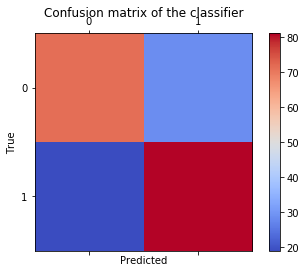

In [276]:
plot_cm(cm=matriz_conf, labels=[0,1])